# Setting up an analysis of the gold price from 2000 to 2021

First let's load necessary libraries ...

The first library that we need to import is pandas, which is a portmanteau of "panel data" and is the most popular Python library for working with tabular data.  It is convention to import pandas under the alias pd. 

In [105]:
import pandas as pd

Next, we'll need to import NumPy, which is a popular library for numerical computing. Numpy is known for its NumPy array data structure as well as its useful methods reshape, arange, and append.  It is convention to import NumPy under the alias np. 

In [106]:
import numpy as np

Next, we'll need to import a linear model from sklearn, which is a popular library for statistical analysis including linear regression.

In [107]:
from sklearn import linear_model

Next, we need to import matplotlib, which is Python's most popular library for data visualization.  matplotlib is typically imported under the alias plt. 

In [108]:
import matplotlib.pyplot as plt

The %matplotlib inline statement will cause of of our matplotlib visualizations to embed themselves directly in our Jupyter Notebook, which makes them easier to access and interpret.

In [109]:
%matplotlib inline

Lastly, you will want to import seaborn, which is another Python data visualization library that makes it easier to create beautiful visualizations using matplotlib.  You can import seaborn with the alias sns.

In [110]:
import seaborn as sns

Finally you can change the style of your seaborn visualization if you like ... 
ie. setting the style to ‘darkgrid’ the palette attribute that is used to set the color of the bars. It helps to distinguish between chunks of data.

In [111]:
sns.set(style="darkgrid")

Next install opendatasets into python in order to more easily download the data from Kaggle ...

In [112]:
!pip install opendatasets

Now load opendatasets into this notebook ...

In [113]:
import opendatasets as od

Now dowload the dataset from Kaggle, using its url ...

On executing the  line below, it will prompt for Kaggle username (saroshnanavati). Kaggle username can be fetched from the Account tab of the My Profile section.

On entering the username, it will prompt for Kaggle Key. Again, go to the account tab of the My Profile section and click on Create New API Token. This will download a kaggle.json file.  Open file with text editor and copy and paste key.

In [114]:
od.download("https://www.kaggle.com/komalkhetlani/gold-prices-historical-data")

Skipping, found downloaded files in ".\gold-prices-historical-data" (use force=True to force download)


Good, 100% means we have completed the download to our computer.

Now read the dataset into this notebook from its location on the computer hard drive ... using the variable df (ie data frame).

In [115]:
df = pd.read_csv('C:\ProgramData\Anaconda3\goldprices.csv')

Let's get some basic information about the data set ...

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5317 entries, 0 to 5316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5317 non-null   object 
 1   Open       5205 non-null   float64
 2   High       5205 non-null   float64
 3   Low        5205 non-null   float64
 4   Close      5205 non-null   float64
 5   Adj Close  5205 non-null   float64
 6   Volume     5205 non-null   float64
dtypes: float64(6), object(1)
memory usage: 290.9+ KB


Let's look at the initial five entries in the dataset and see how they are laid out ...

In [117]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


Let's see how it looks at the end of the dataset ...

In [118]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5312,2021-07-12,1802.599976,1805.500000,1799.500000,1805.500000,1805.500000,218.0
5313,2021-07-13,1808.099976,1812.000000,1800.599976,1809.400024,1809.400024,147.0
5314,2021-07-14,1813.099976,1829.000000,1813.099976,1824.300049,1824.300049,707.0
5315,2021-07-15,1831.599976,1833.000000,1823.400024,1828.400024,1828.400024,99.0
5316,2021-07-16,1830.099976,1831.400024,1814.500000,1814.500000,1814.500000,99.0


Ok, we can see that this is a time series, so let's read the data in again but this time setting the date column as the primary index (necessary for time series analysis).

In [119]:
df = pd.read_csv('C:\ProgramData\Anaconda3\goldprices.csv',parse_dates=True,index_col=0)

Ok, now let's look at the data again ...

In [120]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


Let's rename the headings, making sure that the number of new names matches the number of columns of data (excluding the index column).

In [121]:
df.columns=['open_gold','high_gold','low_gold','close_gold','adj_close_gold','vol_gold'] 

In [122]:
df.head()

,open_gold,high_gold,low_gold,close_gold,adj_close_gold,vol_gold
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


Good.  Notice the index column Date is below the other column headings. 

What is the length of the dataset?

In [123]:
len(df)

5317

Now let's start to check the quality of the dataset.

What are the datatypes for the various columns?

In [124]:
df.dtypes

open_gold         float64
high_gold         float64
low_gold          float64
close_gold        float64
adj_close_gold    float64
vol_gold          float64
dtype: object

Note if we did not read the data in as a time series, we could have changed the Date column data type to datetime like this:

df['Date']= pd.to_datetime(df['Date'])

Let's look at the data file again - notice the index column Date is below the other column headings.

In [125]:
df.head()

,open_gold,high_gold,low_gold,close_gold,adj_close_gold,vol_gold
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


Now let's round the data in the various price columns to 2 decimals ...

In [126]:
np.round(df['open_gold'], decimals = 2)

Date
2000-08-30     273.9
2000-08-31     274.8
2000-09-01     277.0
2000-09-04       NaN
2000-09-05     275.8
               ...  
2021-07-12    1802.6
2021-07-13    1808.1
2021-07-14    1813.1
2021-07-15    1831.6
2021-07-16    1830.1
Name: open_gold, Length: 5317, dtype: float64

In [127]:
np.round(df['high_gold'], decimals = 2)

Date
2000-08-30     273.9
2000-08-31     278.3
2000-09-01     277.0
2000-09-04       NaN
2000-09-05     275.8
               ...  
2021-07-12    1805.5
2021-07-13    1812.0
2021-07-14    1829.0
2021-07-15    1833.0
2021-07-16    1831.4
Name: high_gold, Length: 5317, dtype: float64

In [128]:
np.round(df['low_gold'], decimals = 2)

Date
2000-08-30     273.9
2000-08-31     274.8
2000-09-01     277.0
2000-09-04       NaN
2000-09-05     275.8
               ...  
2021-07-12    1799.5
2021-07-13    1800.6
2021-07-14    1813.1
2021-07-15    1823.4
2021-07-16    1814.5
Name: low_gold, Length: 5317, dtype: float64

In [129]:
np.round(df['close_gold'], decimals = 2)

Date
2000-08-30     273.9
2000-08-31     278.3
2000-09-01     277.0
2000-09-04       NaN
2000-09-05     275.8
               ...  
2021-07-12    1805.5
2021-07-13    1809.4
2021-07-14    1824.3
2021-07-15    1828.4
2021-07-16    1814.5
Name: close_gold, Length: 5317, dtype: float64

In [130]:
np.round(df['adj_close_gold'], decimals = 2)

Date
2000-08-30     273.9
2000-08-31     278.3
2000-09-01     277.0
2000-09-04       NaN
2000-09-05     275.8
               ...  
2021-07-12    1805.5
2021-07-13    1809.4
2021-07-14    1824.3
2021-07-15    1828.4
2021-07-16    1814.5
Name: adj_close_gold, Length: 5317, dtype: float64

That looks better.  Let's continue cleaning up the data.  Are we missing any values?

We can check if any values in the data are null ... 

In [131]:
df.isnull().values.any()

True

OK, so there are some null values in this data.  
But how many are there in each column?

In [132]:
df.isnull().sum()

open_gold         112
high_gold         112
low_gold          112
close_gold        112
adj_close_gold    112
vol_gold          112
dtype: int64

Looks like there are 112 entries in our data fram which have no data.  For the total we could add them up, but we can also try this ...

In [133]:
df.isnull().sum().sum()

672

So it looks like 112 of the 5317 are null data.  That's 2.1% of the data.

We need to deal with this in some way.  We could delete the entries which have no data, but then we would be missing some days in our time series.  Interpolation is probably a reasonable approach here, but using method=time. 
something like ...

In [134]:
df_gold = df.interpolate(method="time")

So let's look at how the new data frame looks after interpolation ...

In [135]:
df_gold.head()

,open_gold,high_gold,low_gold,close_gold,adj_close_gold,vol_gold
Date,,,,,,
2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
2000-09-04,276.099991,276.099991,276.099991,276.099991,276.099991,1.5
2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


Great, we have estimated values for the missing data.  We have created the new data frame new_df so that the original data with missing values is retained (and if we need to, we can determine which data points were interpolated).

Let's see what this data looks like in a chart.

<AxesSubplot:xlabel='Date'>

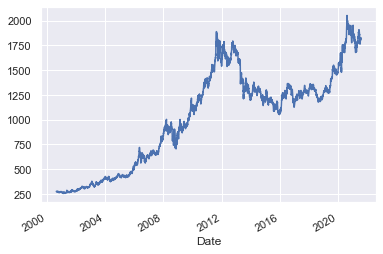

In [136]:
df_gold["close_gold"].plot()

Ok, now let's start pulling in some independant variables for our multiple regression on gold price.

Let's start with the obvious one, the US dollar.

In [137]:
od.download("https://www.kaggle.com/balabaskar/us-dollar-index-data")

Skipping, found downloaded files in ".\us-dollar-index-data" (use force=True to force download)


Good, 100% means we have completed the download to our computer.

Now read the dataset into this notebook from its location on the computer hard drive ... using the variable df_usd (ie data frame for usd).

In [138]:
df_usd = pd.read_csv('C:\\ProgramData\\Anaconda3\\USDollarIndexHistoricalData.csv')

Let's get some basic information on this data set ...

In [139]:
df_usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5000 non-null   object 
 1   Price     5000 non-null   float64
 2   Open      5000 non-null   float64
 3   High      5000 non-null   float64
 4   Low       5000 non-null   float64
 5   Change %  5000 non-null   object 
dtypes: float64(4), object(2)
memory usage: 234.5+ KB


Let's look at the initial five entries in this dataset and see how they are laid out ...

In [140]:
df_usd.head()

,Date,Price,Open,High,Low,Change %
0,"Jan 02, 2001",108.77,109.33,109.65,108.64,-0.72%
1,"Jan 03, 2001",110.17,108.59,110.34,108.09,1.29%
2,"Jan 04, 2001",108.81,110.30,110.40,108.51,-1.23%
3,"Jan 05, 2001",108.42,108.64,109.31,108.26,-0.36%
4,"Jan 08, 2001",108.86,108.33,109.19,108.23,0.41%


Looks good, so let's re-read the data but making the date column the index for the data set ...

In [141]:
df_usd = pd.read_csv('C:\\ProgramData\\Anaconda3\\USDollarIndexHistoricalData.csv',parse_dates=True,index_col=0)

Ok let's take a look at the us dollar price history data set now ...

In [142]:
df_usd.head()

,Price,Open,High,Low,Change %
Date,,,,,
2001-01-02,108.77,109.33,109.65,108.64,-0.72%
2001-01-03,110.17,108.59,110.34,108.09,1.29%
2001-01-04,108.81,110.30,110.40,108.51,-1.23%
2001-01-05,108.42,108.64,109.31,108.26,-0.36%
2001-01-08,108.86,108.33,109.19,108.23,0.41%


Let's rename the headings

In [143]:
df_usd.columns=['close_usd','open_usd','high_usd','low_usd','change%_usd'] 

In [144]:
df_usd.head()

,close_usd,open_usd,high_usd,low_usd,change%_usd
Date,,,,,
2001-01-02,108.77,109.33,109.65,108.64,-0.72%
2001-01-03,110.17,108.59,110.34,108.09,1.29%
2001-01-04,108.81,110.30,110.40,108.51,-1.23%
2001-01-05,108.42,108.64,109.31,108.26,-0.36%
2001-01-08,108.86,108.33,109.19,108.23,0.41%


What is the length of the dataset?

In [145]:
len(df_usd)

5000

Let's check for missing data

In [146]:
df_usd.isnull().values.any()

False

OK, so there are no null values in this data.  Great.

In [147]:
df_usd.isnull().sum()

close_usd      0
open_usd       0
high_usd       0
low_usd        0
change%_usd    0
dtype: int64

Checking another way, for the total we could try this ...

In [148]:
df_usd.isnull().sum().sum()

0

Looks like a good data set.  Let's plot both the USD and the gold price together on the same chart.

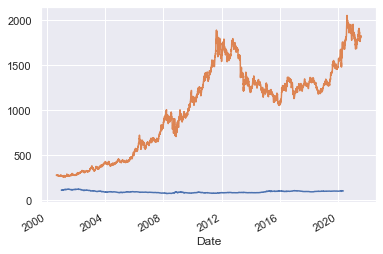

In [149]:
df_usd["close_usd"].plot()
df_gold["close_gold"].plot()
plt.show()

Because the scales are quite different, the usd series does not show up very well.  Let's try them one by one.

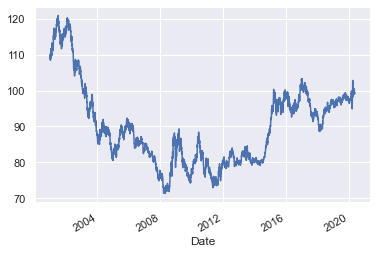

In [150]:
df_usd["close_usd"].plot()
plt.show()

<AxesSubplot:xlabel='Date'>

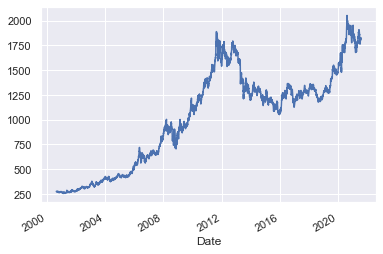

In [151]:
df_gold["close_gold"].plot()

Interesting - we can visually see what appears to be a negative correlation.  But before we move on to our statistical analysis, how do we make sure the dates allign for our USD and gold price data sets?

Let's merge the two data sets, using the date column as the index and merging only those years where both data sets have data (using the how="inner" argument.

In [152]:
merged_df = pd.merge(df_gold,df_usd,on="Date",how="inner")

In [153]:
merged_df.head()

,open_gold,high_gold,low_gold,close_gold,adj_close_gold,vol_gold,close_usd,open_usd,high_usd,low_usd,change%_usd
Date,,,,,,,,,,,
2001-01-02,268.399994,268.399994,268.399994,268.399994,268.399994,0.0,108.77,109.33,109.65,108.64,-0.72%
2001-01-03,268.000000,268.000000,268.000000,268.000000,268.000000,1.0,110.17,108.59,110.34,108.09,1.29%
2001-01-04,267.299988,267.299988,267.299988,267.299988,267.299988,1.0,108.81,110.30,110.40,108.51,-1.23%
2001-01-05,268.000000,268.000000,268.000000,268.000000,268.000000,0.0,108.42,108.64,109.31,108.26,-0.36%
2001-01-08,268.000000,268.000000,268.000000,268.000000,268.000000,0.0,108.86,108.33,109.19,108.23,0.41%


Let's look at the attributes of the merged data frame ...

In [154]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4889 entries, 2001-01-02 to 2020-05-04
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   open_gold       4889 non-null   float64
 1   high_gold       4889 non-null   float64
 2   low_gold        4889 non-null   float64
 3   close_gold      4889 non-null   float64
 4   adj_close_gold  4889 non-null   float64
 5   vol_gold        4889 non-null   float64
 6   close_usd       4889 non-null   float64
 7   open_usd        4889 non-null   float64
 8   high_usd        4889 non-null   float64
 9   low_usd         4889 non-null   float64
 10  change%_usd     4889 non-null   object 
dtypes: float64(10), object(1)
memory usage: 458.3+ KB


We've lost some years merging the two data sets, but that's ok.

Now let's consider our regression ... some preliminary steps include ...

Checking for outliers in the data ... we can use box plots for that ...

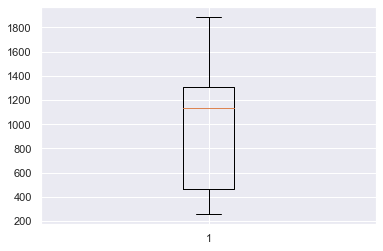

In [155]:
plt.boxplot(merged_df["close_gold"])
plt.show()

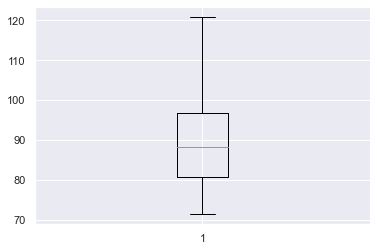

In [156]:
plt.boxplot(merged_df["close_usd"])
plt.show()

Good.  It appears there are no outliers in the data (defined as First Quartile -  1.5 x Inter Quartile Range and Third Quartile + 1.5 x Inter Quartile Range. Outliers would appear as bubbles on the plots.

Now lets do a simple xy plot to visually inspect the relationship and consider if it looks linear.

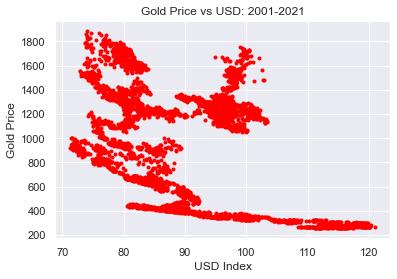

In [157]:
plt.scatter(merged_df.close_usd, merged_df.close_gold, color='red', marker='.')
plt.title('Gold Price vs USD: 2001-2021')
plt.xlabel('USD Index')
plt.ylabel('Gold Price')
plt.show()

With some obvious exceptions, we can see something resembling an inverse relationship between the usd and gold (the expected outcome).  The stronger the USD index, the lower the gold price and vice versa.

Let's assign our x and y variables their corresponding numpy array values

merged_df = merged_df.reset_index()

merged_df.head()

In [167]:
y = np.array(merged_df['Date','close_gold'], dtype=float)

KeyError: ('Date', 'close_gold')

In [163]:
x = np.array(merged_df['Date','close_usd'], dtype=float)

KeyError: ('Date', 'close_gold')

In [159]:
x

array([108.77, 110.17, 108.81, ...,  99.02,  99.08,  99.48])

In [160]:
y

array([ 268.399994,  268.      ,  267.299988, ..., 1684.199951,
       1694.5     , 1706.900024])

Let's include a constant in our regression (must do manually) and run the ordinary least squares (OLS) regression

x = sm.add_constant(x) #add constant to predictor variables
model = sm.OLS(y, x).fit() #fit linear regression model
print(model.summary()) #view model summary

Let's remove the index from the date column ...

In [161]:
reg = linear_model.LinearRegression()
reg.fit(x,y)

ValueError: Expected 2D array, got 1D array instead:
array=[108.77 110.17 108.81 ...  99.02  99.08  99.48].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.